In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_sdn.csv/dataset_sdn.csv')

In [ ]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
data.shape

(104345, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
##### Here we see that the label contains boolean values: 0 - Benign, 1-Maliciuous 
data.label.unique()

array([0, 1])

In [ ]:
data.label.value_counts()

0    63561
1    40784
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


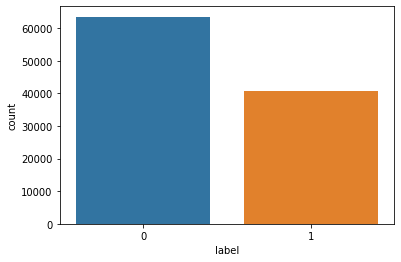

In [ ]:
label_dict = dict(data.label.value_counts())
sns.countplot(data.label)

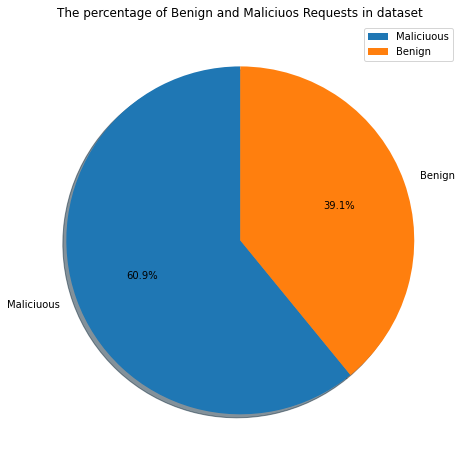

In [ ]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [ ]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

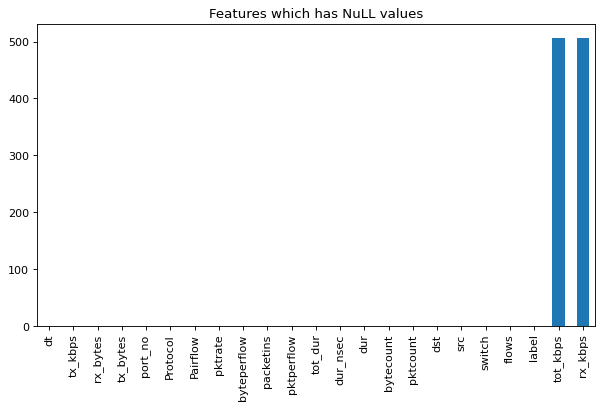

In [ ]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [ ]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [ ]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

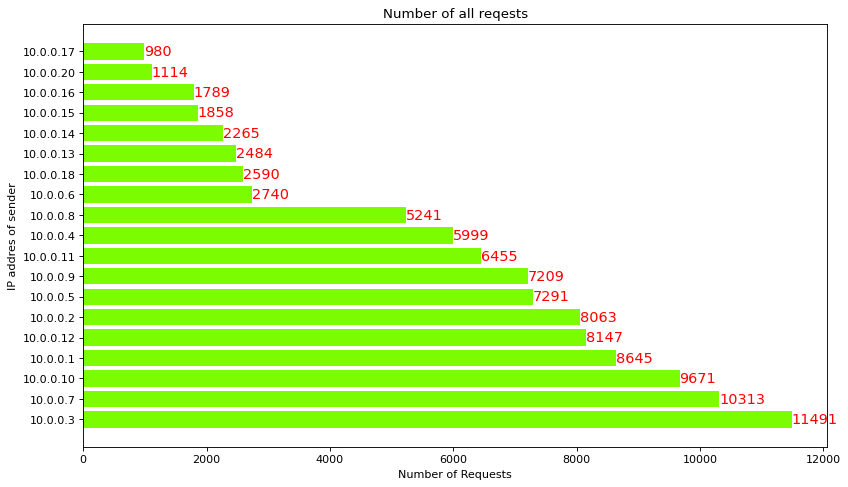

In [ ]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

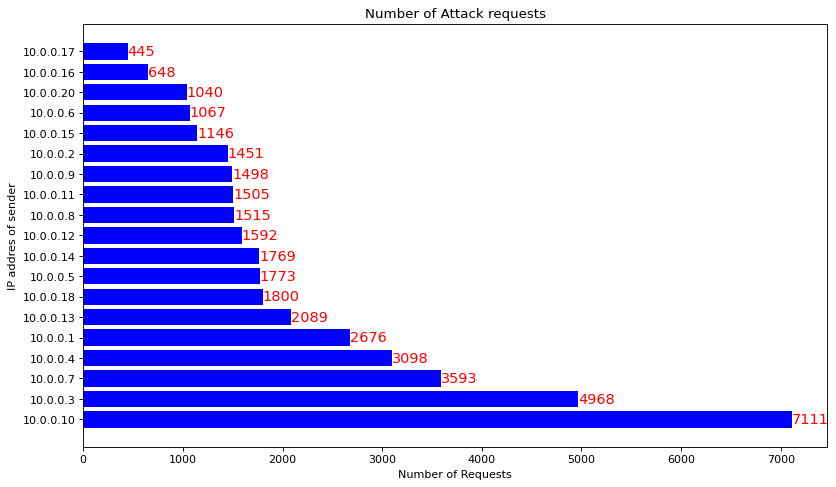

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

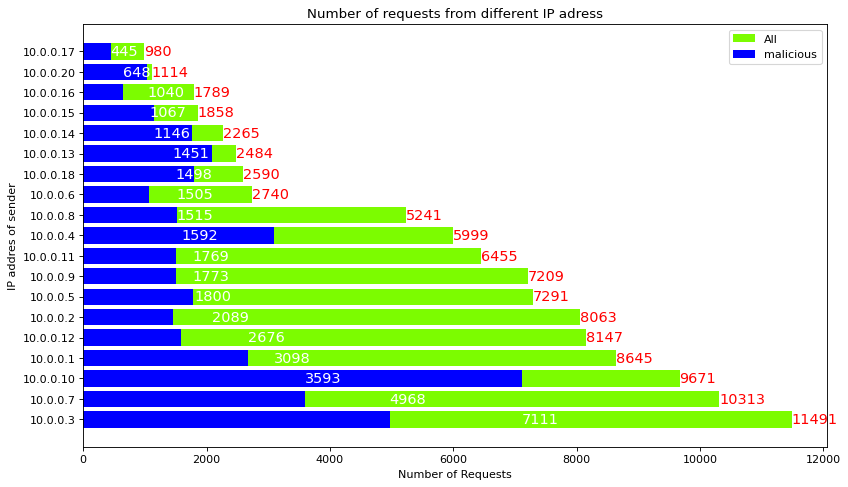

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

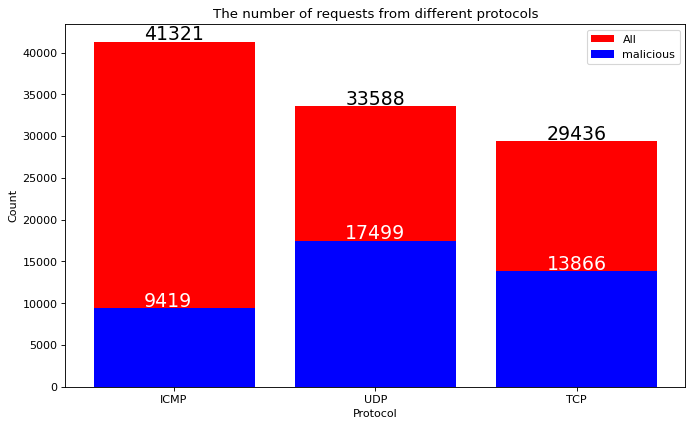

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [ ]:
df = data.copy()

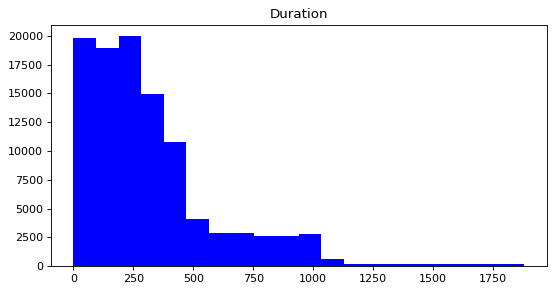

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

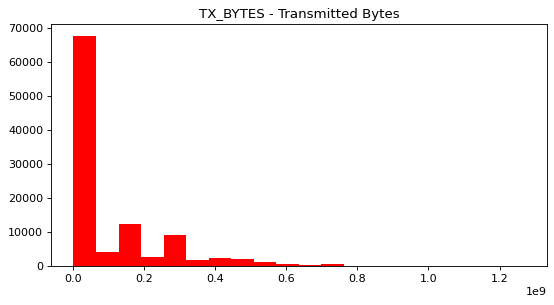

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

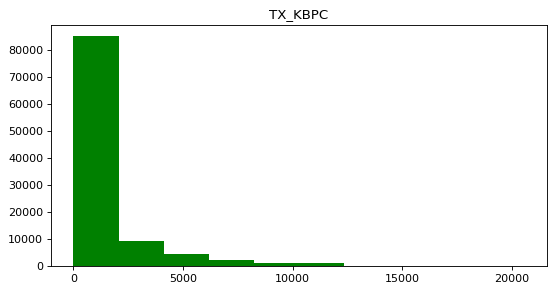

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

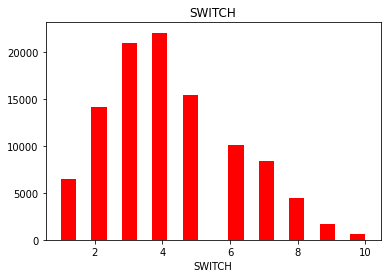

In [ ]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

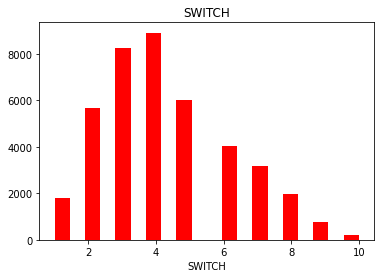

In [ ]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import seaborn as sn

In [ ]:

class Model:
    global y
    global Data
    def __init__(self, data):
        Data=data
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)

        

        # Compute the confusion matrix
        cm = confusion_matrix(self.y_test, predicted_lr)
        print("Confusion Matrix:\n", cm)

        # Plot the confusion matrix using seaborn
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 20})
        plt.title("Confusion Matrix for Logistic Regression", fontsize=20)
        plt.xlabel("Predicted Label", fontsize=20)
        plt.ylabel("True Label", fontsize=20)
        plt.show()


  

        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))


        ac  = accuracy_score(self.y_test, predicted_lr)
        pre = precision_score(self.y_test, predicted_lr)
        re  = recall_score(self.y_test, predicted_lr)
        f1  = f1_score(self.y_test, predicted_lr)
        print("Accuracy    =", ac)
        print("Precison    =",pre)
        print("Recall      =", re)
        print("f1 score    =", f1)
        
        probability_lr = LR.predict_proba(self.X_test)
        print(probability_lr)
        prob_lr = probability_lr[:,1]
        roc_auc_lr = roc_auc_score(self.y_test,prob_lr)
        print("Roc Auc Score of LogisticRegression = ", roc_auc_lr)
        fpr_lr,tpr_lr, _ = roc_curve(self.y_test,prob_lr)

        

        plt.figure(figsize=(2,1), dpi=300)
        sn.set(font_scale= 0.3)
        sn.set_style("darkgrid")
        plt.plot(fpr_lr,tpr_lr, label = 'AUC = %0.4f' % roc_auc_lr)
        plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
        plt.title("roc curve")
        plt.xlabel("False Positive Rate(fpr)")
        plt.ylabel("True Positive Rate(tpr)")
        plt.legend(loc="lower right")
        plt.show()
        return LR
       
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel,probability=True).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)
        
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name,probability=True).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)

        # Compute the confusion matrix
        cm = confusion_matrix(self.y_test, predicted_svm)
        print("Confusion Matrix:\n", cm)

        # Plot the confusion matrix using seaborn
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 20})
        plt.title("Confusion Matrix for SVM", fontsize=20)
        plt.xlabel("Predicted Label", fontsize=20)
        plt.ylabel("True Label", fontsize=20)
        plt.show()



        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

        ac  = accuracy_score(self.y_test, predicted_svm)
        pre = precision_score(self.y_test, predicted_svm)
        re  = recall_score(self.y_test, predicted_svm)
        f1  = f1_score(self.y_test, predicted_svm)
        print("Accuracy    =", ac)
        print("Precison    =",pre)
        print("Recall      =", re)
        print("f1 score    =", f1)
        
        probability_svm = SVM.predict_proba(self.X_test)
        print(probability_svm)
        prob_svm = probability_svm[:,1]
        roc_auc_svm = roc_auc_score(self.y_test,prob_svm)
        print("Roc Auc Score of SVM = ", roc_auc_svm)
        fpr_svm,tpr_svm, _ = roc_curve(self.y_test,prob_svm)



        plt.figure(figsize=(2,1), dpi=300)
        sn.set(font_scale= 0.3)
        sn.set_style("darkgrid")
        plt.plot(fpr_svm,tpr_svm, label = 'AUC = %0.4f' % roc_auc_svm)
        plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
        plt.title("roc curve")
        plt.xlabel("False Positive Rate(fpr)")
        plt.ylabel("True Positive Rate(tpr)")
        plt.legend(loc="lower right")
        plt.show()
        return SVM
        
    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict  
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n') # courseranyn ozinde tek osy gana jazylyp turdy
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()
        
        
        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)
        
        knnc_search.fit(self.X_train, self.y_train)
        print(knnc_search.best_params_)
        print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)
        
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)

        # Compute the confusion matrix
        cm = confusion_matrix(self.y_test, predicted_knn)
        print("Confusion Matrix:\n", cm)

        # Plot the confusion matrix using seaborn
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 20})
        plt.title("Confusion Matrix for KNN", fontsize=20)
        plt.xlabel("Predicted Label", fontsize=20)
        plt.ylabel("True Label", fontsize=20)
        plt.show()


        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

        ac  = accuracy_score(self.y_test, yhat)
        pre = precision_score(self.y_test, yhat)
        re  = recall_score(self.y_test, yhat)
        f1  = f1_score(self.y_test, yhat)
        print("Accuracy    =", ac)
        print("Precison    =",pre)
        print("Recall      =", re)
        print("f1 score    =", f1)
        
        probability_neigh = neigh.predict_proba(self.X_test)
        print(probability_neigh)
        prob_neigh = probability_neigh[:,1]
        roc_auc_neigh = roc_auc_score(self.y_test,prob_neigh)
        print("Roc Auc Score of KNN = ", roc_auc_neigh)
        fpr_neigh,tpr_neigh, _ = roc_curve(self.y_test,prob_neigh)



        plt.figure(figsize=(2,1), dpi=300)
        sn.set(font_scale= 0.3)
        sn.set_style("darkgrid")
        plt.plot(fpr_neigh,tpr_neigh, label = 'AUC = %0.4f' % roc_auc_neigh)
        plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
        plt.title("roc curve")
        plt.xlabel("False Positive Rate(fpr)")
        plt.ylabel("True Positive Rate(tpr)")
        plt.legend(loc="lower right")
        plt.show()
        return KNN
        
    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
        
        dt_search.fit(self.X_train, self.y_train)
        
        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']
        
        dtree = DecisionTreeClassifier(criterion=criterion, 
                                       max_depth=max_depth, 
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)

        # Compute the confusion matrix
        cm = confusion_matrix(self.y_test, predicted_dt)
        print("Confusion Matrix:\n", cm)

        # Plot the confusion matrix using seaborn
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 20})
        plt.title("Confusion Matrix for DT", fontsize=20)
        plt.xlabel("Predicted Label", fontsize=20)
        plt.ylabel("True Label", fontsize=20)
        plt.show()



        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))

        ac  = accuracy_score(self.y_test, predicted_dt)
        pre = precision_score(self.y_test, predicted_dt)
        re  = recall_score(self.y_test, predicted_dt)
        f1  = f1_score(self.y_test, predicted_dt)
        print("Accuracy    =", ac)
        print("Precison    =",pre)
        print("Recall      =", re)
        print("f1 score    =", f1)
        
        probability_dtree = dtree.predict_proba(self.X_test)
        print(probability_dtree)
        prob_dtree = probability_dtree[:,1]
        roc_auc_dtree = roc_auc_score(self.y_test,prob_dtree)
        print("Roc Auc Score of DT = ", roc_auc_dtree)
        fpr_dtree,tpr_dtree, _ = roc_curve(self.y_test,prob_dtree)

        


        plt.figure(figsize=(2,1), dpi=300)
        sn.set(font_scale= 0.3)
        sn.set_style("darkgrid")
        plt.plot(fpr_dtree,tpr_dtree, label = 'AUC = %0.4f' % roc_auc_dtree)
        plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
        plt.title("roc curve")
        plt.xlabel("False Positive Rate(fpr)")
        plt.ylabel("True Positive Rate(tpr)")
        plt.legend(loc="lower right")
        plt.show()
        return dtree
    
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        
        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)

        # Compute the confusion matrix
        cm = confusion_matrix(self.y_test, predicted_rf)
        print("Confusion Matrix:\n", cm)

        # Plot the confusion matrix using seaborn
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 20})
        plt.title("Confusion Matrix for RF", fontsize=20)
        plt.xlabel("Predicted Label", fontsize=20)
        plt.ylabel("True Label", fontsize=20)
        plt.show()


        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))

        ac  = accuracy_score(self.y_test, predicted_rf)
        pre = precision_score(self.y_test, predicted_rf)
        re  = recall_score(self.y_test, predicted_rf)
        f1  = f1_score(self.y_test, predicted_rf)
        print("Accuracy    =", ac)
        print("Precison    =",pre)
        print("Recall      =", re)
        print("f1 score    =", f1)
        
        probability_RF = RF.predict_proba(self.X_test)
        print(probability_RF)
        prob_RF = probability_RF[:,1]
        roc_auc_RF = roc_auc_score(self.y_test,prob_RF)
        print("Roc Auc Score of RF = ", roc_auc_RF)
        fpr_RF,tpr_RF, _ = roc_curve(self.y_test,prob_RF)

        

        plt.figure(figsize=(2,1), dpi=300)
        sn.set(font_scale= 0.3)
        sn.set_style("darkgrid")
        plt.plot(fpr_RF,tpr_RF, label = 'AUC = %0.4f' % roc_auc_RF)
        plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
        plt.title("roc curve")
        plt.xlabel("False Positive Rate(fpr)")
        plt.ylabel("True Positive Rate(tpr)")
        plt.legend(loc="lower right")
        plt.show()
        return RF

    def Afridi(self):
        M=Model(self.data)
        lr=M.LogisticRegression()
        svm=M.SupportVectorMachine()
        dt=M.DecisionTree()
        knn=M.KNearetsNeighbor()
        rf=M.RandomForest()

        
        # Plot the ROC AUC curve for the Logistic Regression model
        fpr_lr, tpr_lr, thresholds_lr = roc_curve(self.y_test, lr.predict_proba(self.X_test)[:, 1])
        auc_lr = roc_auc_score(self.y_test, lr.predict_proba(self.X_test)[:, 1])

        # Plot the ROC AUC curve for the Support Vector Machine model
        fpr_svm, tpr_svm, thresholds_svm = roc_curve(self.y_test, svm.predict_proba(self.X_test)[:, 1])
        auc_svm = roc_auc_score(self.y_test, svm.predict_proba(self.X_test)[:, 1])

        # Plot the ROC AUC curve for the Random Forest model
        fpr_rf, tpr_rf, thresholds_rf = roc_curve(self.y_test, rf.predict_proba(self.X_test)[:, 1])
        auc_rf = roc_auc_score(self.y_test, rf.predict_proba(self.X_test)[:, 1])

        # Plot the ROC AUC curve for the Decision Tree model
        fpr_dt, tpr_dt, thresholds_dt = roc_curve(self.y_test, dt.predict_proba(self.X_test)[:, 1])
        auc_dt = roc_auc_score(self.y_test, dt.predict_proba(self.X_test)[:, 1])

        # Plot the ROC AUC curve for the k-Nearest Neighbors model
        fpr_knn, tpr_knn, thresholds_knn = roc_curve(self.y_test, knn.predict_proba(self.X_test)[:, 1])
        auc_knn = roc_auc_score(self.y_test, knn.predict_proba(self.X_test)[:, 1])

        # Plot the ROC AUC curves in one figure
        plt.figure(figsize=(10,7))
        plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
        plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm)
        plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt)
        plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
        plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn)
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate', fontsize=20)
        plt.ylabel('True Positive Rate', fontsize=20)
        plt.title('ROC AUC Curves for Different Models', fontsize=20)
        plt.legend(fontsize=10)
        plt.show()
# """
# Decision Tree works Well
# Suppert Vector Machine works well
# Logistic Regression works well
# KNN works well
# Random Forest works well
# """

In [ ]:
df = data.copy()
df = df.dropna()
# df = df.iloc[:100]

In [ ]:
X = df.drop(['dt','src','dst','label'], axis=1)
y = df.label

In [ ]:
X = pd.get_dummies(X)

In [ ]:
M = Model(X)

Confusion Matrix:
 [[15866  3120]
 [ 4158  8008]]


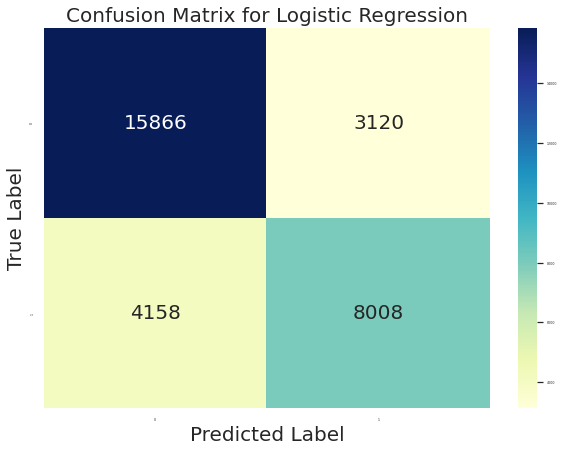

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 6.259932994842529 seconds --- time for LogisticRegression
Accuracy    = 0.7663713405238829
Precison    = 0.719626168224299
Recall      = 0.6582278481012658
f1 score    = 0.6875590280758993
[[0.35003877 0.64996123]
 [0.41479011 0.58520989]
 [0.80711976 0.19288024]
 ...
 [0.10337135 0.89662865]
 [0.14844928 0.85155072]
 [0.72347021 0.27652979]]
Roc Auc Score of LogisticRegression =  0.848390526523614

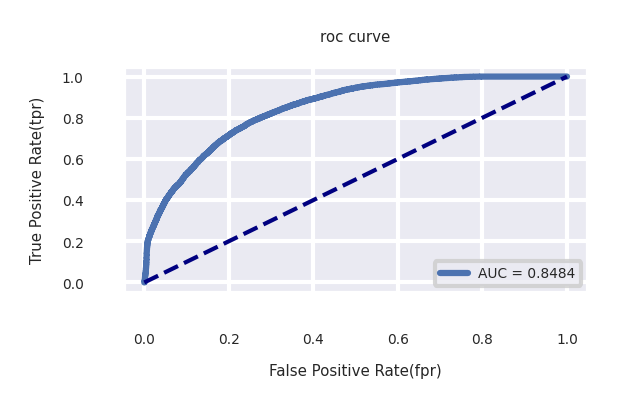

Accuracy: 78.40%
######################################################################
Accuracy: 96.53%
######################################################################
Accuracy: 96.67%
######################################################################
Accuracy: 54.52%
######################################################################
Confusion Matrix:
 [[18350   636]
 [  400 11766]]


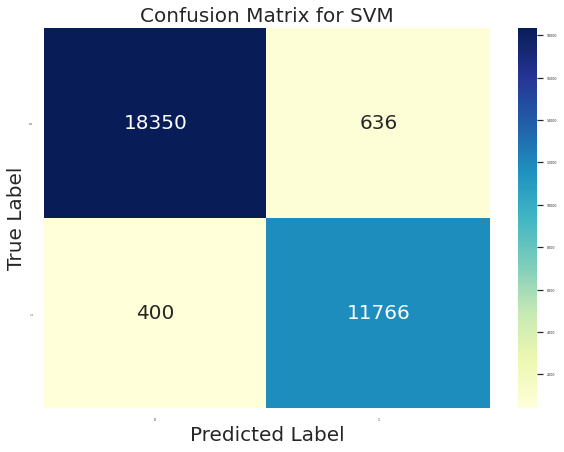

Accuracy of SVM model 97.0% 

########################################################################
best kernel is :  rbf
########################################################################
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18750
           1       0.97      0.95      0.96     12402

    accuracy                           0.97     31152
   macro avg       0.97      0.96      0.97     31152
weighted avg       0.97      0.97      0.97     31152

########################################################################
--- 8867.621484994888 seconds ---
Accuracy    = 0.966743708269132
Precison    = 0.9487179487179487
Recall      = 0.9671214861088279
f1 score    = 0.9578313253012049
[[2.93447591e-03 9.97065524e-01]
 [5.07893888e-07 9.99999492e-01]
 [9.99974118e-01 2.58821966e-05]
 ...
 [3.29124073e-07 9.99999671e-01]
 [1.09045357e-02 9.89095464e-01]
 [9.82981424e-01 1.70185758e-02]]
Roc Auc Score of SVM =  0.9945324

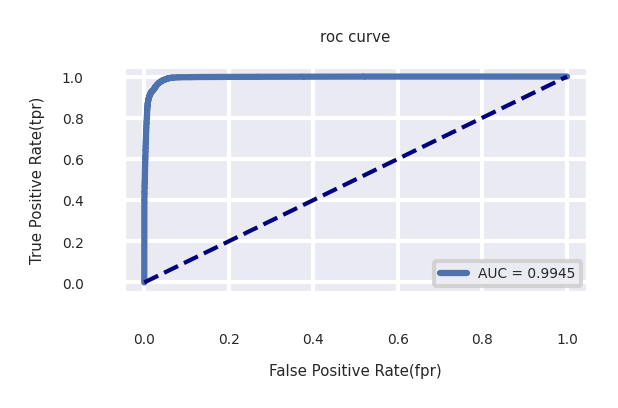

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Confusion Matrix:
 [[18588   398]
 [  155 12011]]


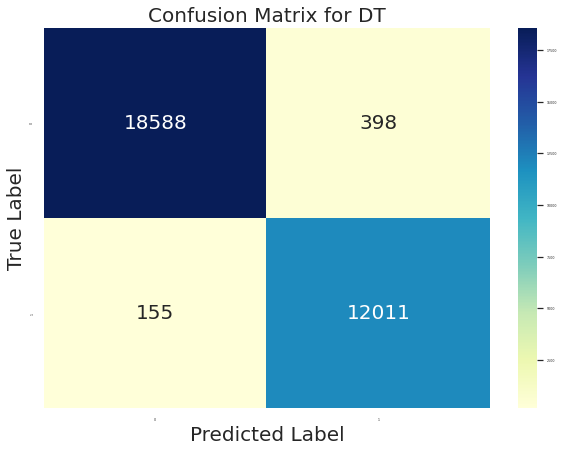

criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 130.45919346809387 seconds ---
Accuracy    = 0.98224833076528
Precison    = 0.9679265049560802
Recall      = 0.9872595758671708
f1 score    = 0.977497456765005
[[0.02162838 0.97837162]
 [0.02162838 0.97837162]
 [1.         0.        ]
 ...
 [0.02162838 0.97837162]
 [0.02162838 0.97837162]
 [1.         0.        ]]
Roc Auc Score of DT =  0.9926740905275054


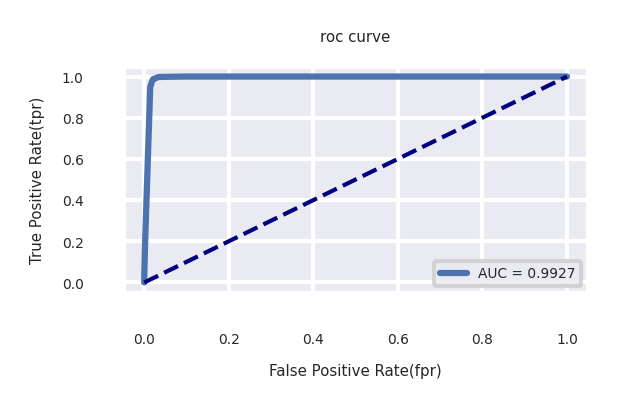

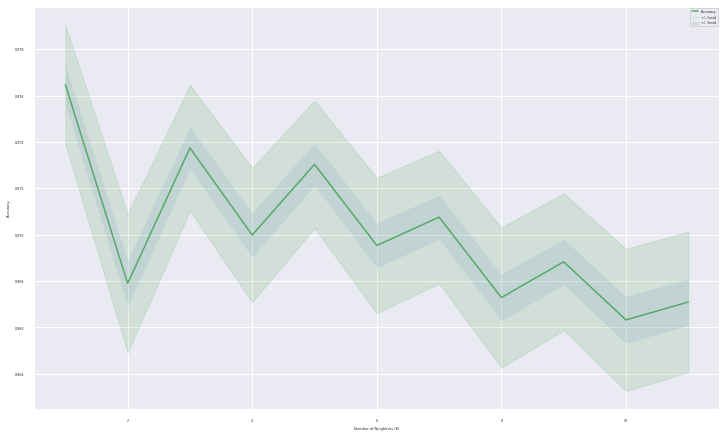

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.9809732139172067
Confusion Matrix:
 [[18737   249]
 [  265 11901]]


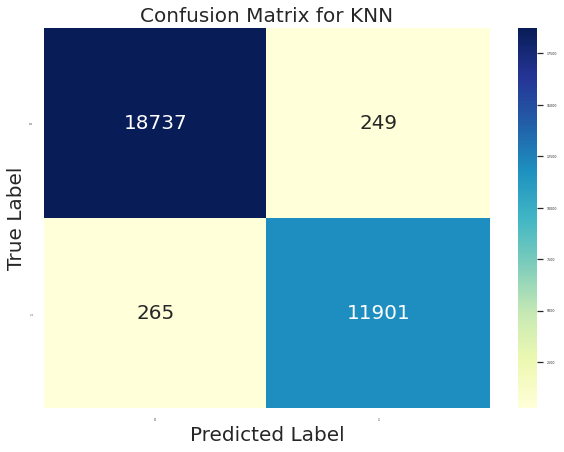

Accuracy of KNN model 98.0% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19002
           1       0.98      0.98      0.98     12150

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 914.5423984527588 seconds ---
Accuracy    = 0.9670968156137648
Precison    = 0.9615543955588698
Recall      = 0.953887884267631
f1 score    = 0.9577057974004539
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Roc Auc Score of KNN =  0.9945981399135755


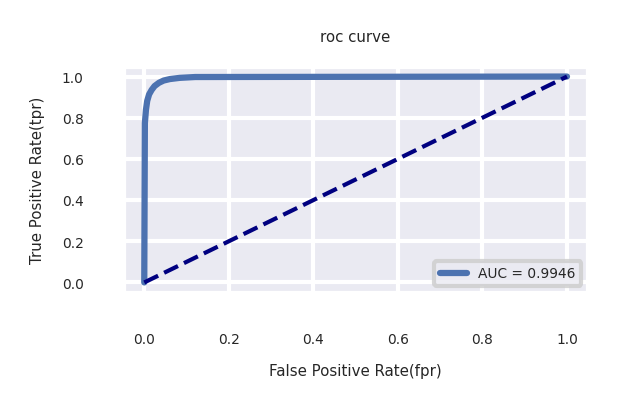

Confusion Matrix:
 [[18984     2]
 [    0 12166]]


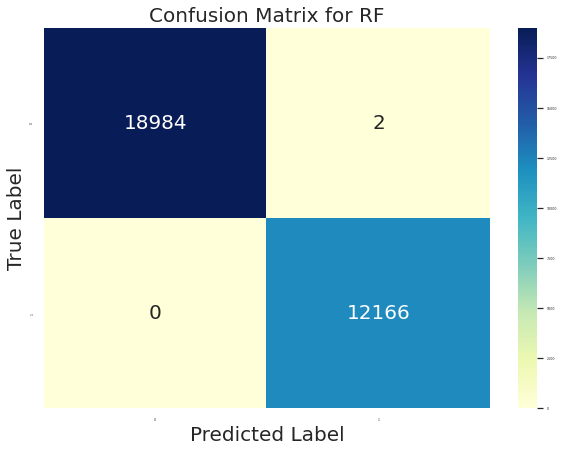

Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18984
           1       1.00      1.00      1.00     12168

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
--- 29.767133474349976 seconds ---
Accuracy    = 0.9999357986646122
Precison    = 0.9998356344510191
Recall      = 1.0
f1 score    = 0.999917810470946
[[0.02741688 0.97258312]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]]
Roc Auc Score of RF =  1.0


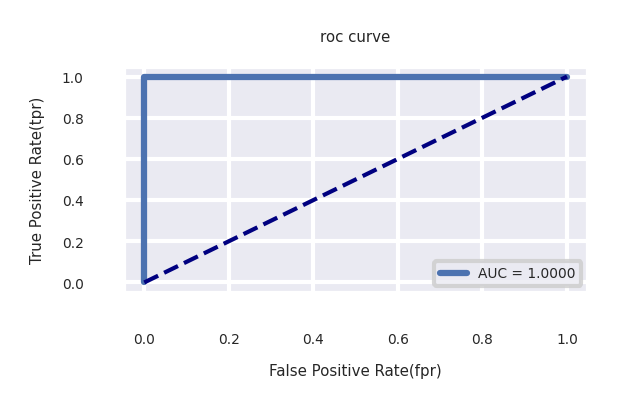

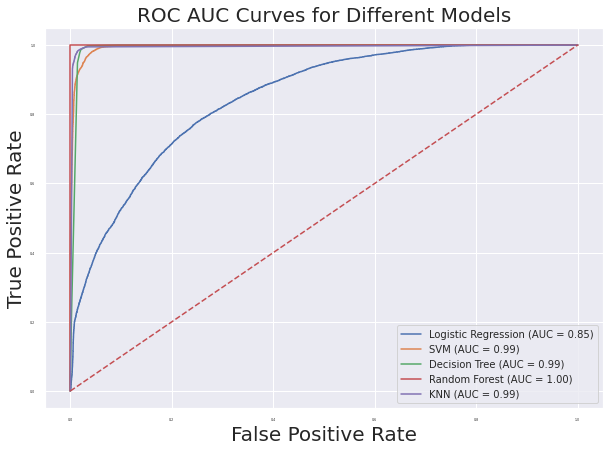

In [ ]:
M.Afridi()

Confusion Matrix:
 [[15866  3120]
 [ 4158  8008]]


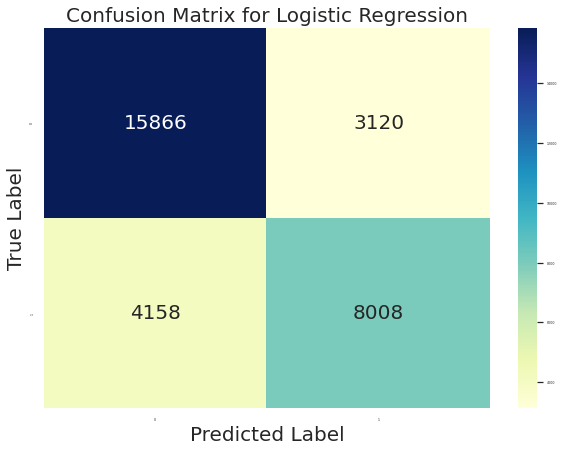

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 6.292382001876831 seconds --- time for LogisticRegression
Accuracy    = 0.7663713405238829
Precison    = 0.719626168224299
Recall      = 0.6582278481012658
f1 score    = 0.6875590280758993
[[0.35003877 0.64996123]
 [0.41479011 0.58520989]
 [0.80711976 0.19288024]
 ...
 [0.10337135 0.89662865]
 [0.14844928 0.85155072]
 [0.72347021 0.27652979]]
Roc Auc Score of LogisticRegression =  0.848390526523614

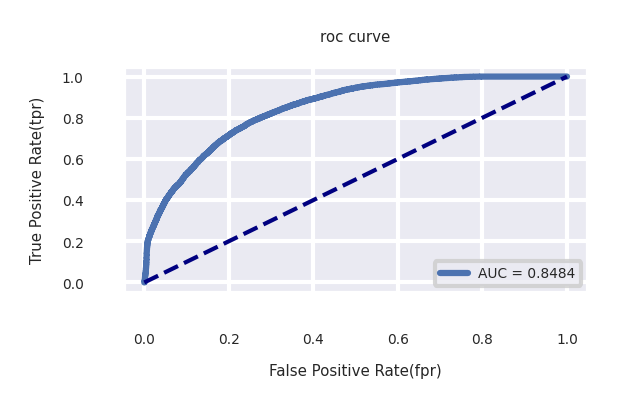

In [ ]:
## Logistic Regression(Without FS)
lr=M.LogisticRegression()

Accuracy: 78.40%
######################################################################
Accuracy: 96.53%
######################################################################
Accuracy: 96.67%
######################################################################
Accuracy: 54.52%
######################################################################
Confusion Matrix:
 [[18350   636]
 [  400 11766]]


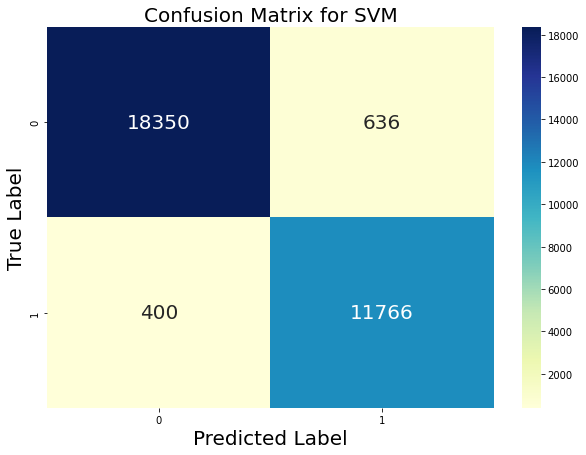

Accuracy of SVM model 97.0% 

########################################################################
best kernel is :  rbf
########################################################################
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18750
           1       0.97      0.95      0.96     12402

    accuracy                           0.97     31152
   macro avg       0.97      0.96      0.97     31152
weighted avg       0.97      0.97      0.97     31152

########################################################################
--- 9247.958045244217 seconds ---
Accuracy    = 0.966743708269132
Precison    = 0.9487179487179487
Recall      = 0.9671214861088279
f1 score    = 0.9578313253012049
[[2.94248908e-03 9.97057511e-01]
 [5.11022202e-07 9.99999489e-01]
 [9.99974116e-01 2.58835341e-05]
 ...
 [3.31175622e-07 9.99999669e-01]
 [1.09316410e-02 9.89068359e-01]
 [9.82999265e-01 1.70007347e-02]]
Roc Auc Score of SVM =  0.9945325

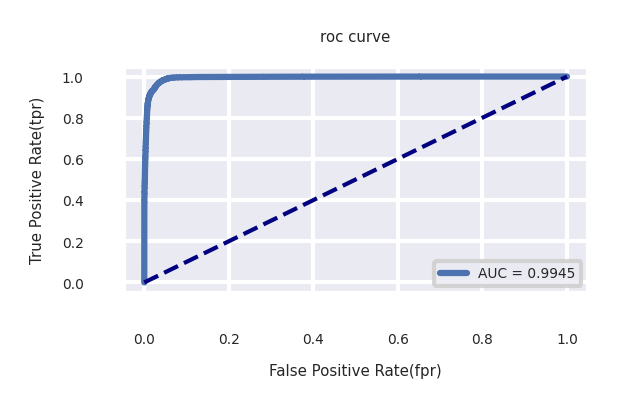

SVC(probability=True)

In [ ]:
## Support Vector Machine(Without FS)
M.SupportVectorMachine()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Confusion Matrix:
 [[18588   398]
 [  155 12011]]


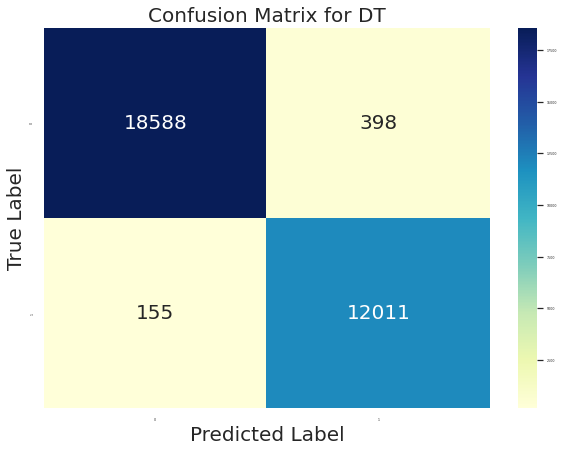

criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 157.65911293029785 seconds ---
Accuracy    = 0.98224833076528
Precison    = 0.9679265049560802
Recall      = 0.9872595758671708
f1 score    = 0.977497456765005
[[0.02162838 0.97837162]
 [0.02162838 0.97837162]
 [1.         0.        ]
 ...
 [0.02162838 0.97837162]
 [0.02162838 0.97837162]
 [1.         0.        ]]
Roc Auc Score of DT =  0.9926740905275054


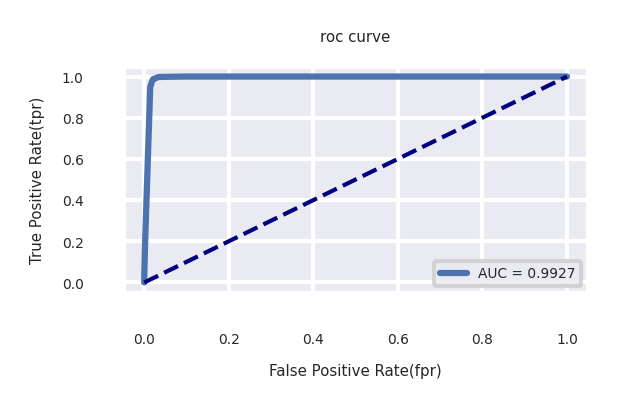

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=11)

In [ ]:
## Decision Tree(Without FS)
M.DecisionTree()

Confusion Matrix:
 [[18984     2]
 [    0 12166]]


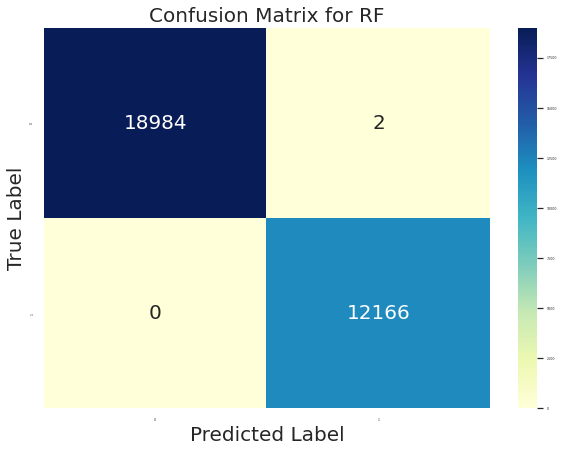

Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18984
           1       1.00      1.00      1.00     12168

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
--- 38.636396169662476 seconds ---
Accuracy    = 0.9999357986646122
Precison    = 0.9998356344510191
Recall      = 1.0
f1 score    = 0.999917810470946
[[0.02741688 0.97258312]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]]
Roc Auc Score of RF =  1.0


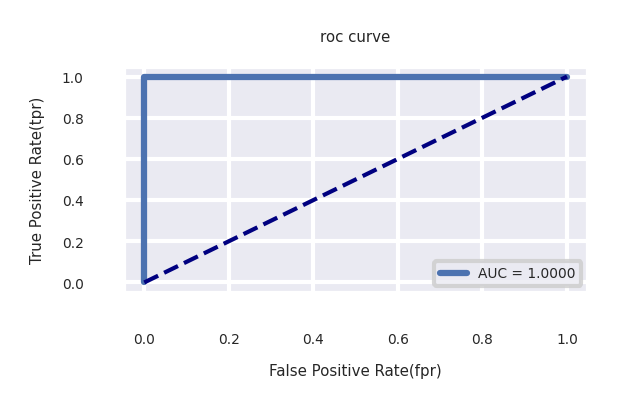

RandomForestClassifier(min_samples_split=10, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=1)

In [ ]:
## Random Forest Classification(Without FS)
M.RandomForest()

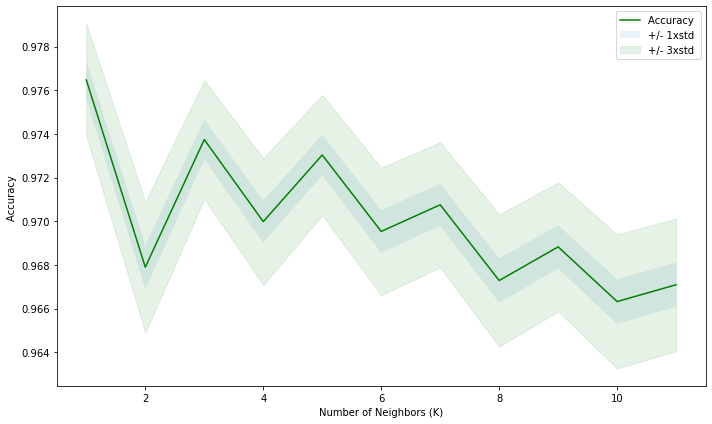

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.9809732139172067
Confusion Matrix:
 [[18737   249]
 [  265 11901]]


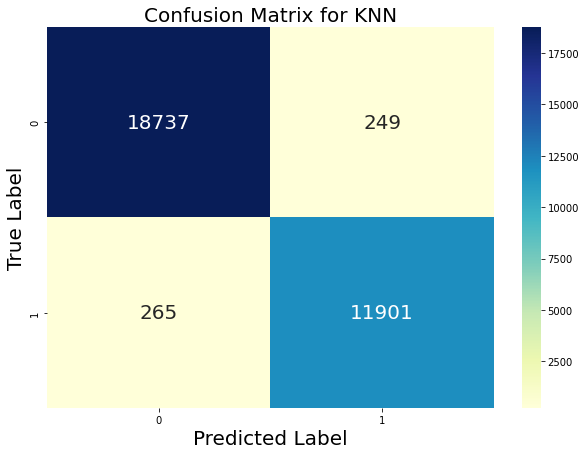

Accuracy of KNN model 98.0% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19002
           1       0.98      0.98      0.98     12150

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 1583.9626741409302 seconds ---
Accuracy    = 0.9670968156137648
Precison    = 0.9615543955588698
Recall      = 0.953887884267631
f1 score    = 0.9577057974004539
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Roc Auc Score of KNN =  0.9945981399135755


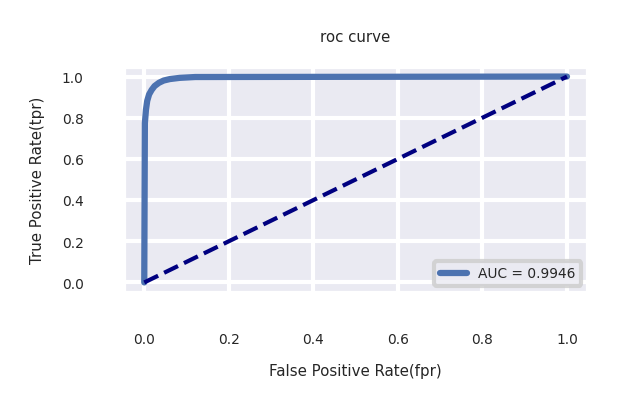

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
M.KNearetsNeighbor()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# # Split the data into training and validation sets
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# # Train the individual models
# # svm_model = SVC(kernel='linear', C=1)
# # svm_model.fit(x_train, y_train)

# # dt_model = DecisionTreeClassifier()
# # dt_model.fit(x_train, y_train)

# # ann_model = MLPClassifier(hidden_layer_sizes=(64, 128, 256), activation='relu')
# # ann_model.fit(x_train, y_train)

# rf_model = RandomForestClassifier(n_estimators=100)
# rf_model.fit(x_train, y_train)

# # Make predictions using the individual models
# # svm_preds = svm_model.predict(x_val)
# # dt_preds = dt_model.predict(x_val)
# # ann_preds = ann_model.predict(x_val)
# rf_preds = rf_model.predict(x_val)

# # Combine the predictions using majority voting
# ensemble_preds = np.array([])
# for i in range(len(x_val)):
#     predictions = [rf_preds[i]]
#     ensemble_preds = np.append(ensemble_preds, max(set(predictions), key=predictions.count))

# # Evaluate the ensemble model
# ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
# print('Ensemble Accuracy(maximum): ', ensemble_accuracy)

In [ ]:
# plt.figure(figsize=(2,1), dpi=300)
# sn.set(font_scale= 0.3)
# sn.set_style("darkgrid")
# # plt.plot(fpr_dt,tpr_dt, label = 'AUC_dt = %0.4f' % roc_auc_rf)
# # plt.plot(fpr_knn,tpr_knn, label = 'AUC_knn = %0.4f' % auc_knn)
# # plt.plot(fpr_svm,tpr_svm, label = 'AUC_svm = %0.4f' % roc_auc_svm)
# plt.plot(fpr_lr,tpr_lr, label = 'AUC_lr = %0.4f' % roc_auc_lr)
# # plt.plot(fpr_nb,tpr_nb, label = 'AUC_nb = %0.4f' % roc_auc_nb)
# plt.plot(fpr_rf,tpr_rf, label = 'AUC_rf = %0.4f' % roc_auc_rf)
# plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
# plt.title("roc curve")
# plt.xlabel("False Positive Rate(fpr)")
# plt.ylabel("True Positive Rate(tpr)")
# plt.legend(loc="lower right")
# plt.show() 

In [ ]:
df1 = data.copy()

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.columns

In [ ]:
df1.info()

In [ ]:
important_features = [
    'src',
    'pktcount',
    'dst',
    'byteperflow',
    'pktperflow',
    'pktrate',
    'tot_kbps',
    'rx_kbps',
    'flows',
    'bytecount',
    'dt',
    'Protocol',
    'dur',
    'tot_dur'
                      
                     ]


weights = [
    17.87,
    15.16,
    13.64,
    12.97,
    11.35,
    11.35,
    9.68,
    9.66,
    8.95,
    4.92,
    2.33,
    1.31,
    1.11,
    1.11
]

In [ ]:
weighted_features = pd.DataFrame({'features':important_features,
                                 'weights':weights})
weighted_features

In [ ]:
### But we dont need src, dst, dt, So, we will drop them
X = df1[important_features]
y = df1.label

X = X.drop(['src', 'dst', 'dt'], axis=1)

In [ ]:
X.head()

In [ ]:
abs(X.corr())

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(X.corr()), annot=True)

In [ ]:
## There some duplicated features and high correlated features

In [ ]:
## "dur" and "tot_dur"
## "pktperflow" and "pktrate"

X = X.drop(['dur', "pktrate", "pktperflow"], axis=1)

In [ ]:
X.columns

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(X.corr()), annot=True)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
M = Model(X)

Confusion Matrix:
 [[15866  3120]
 [ 4158  8008]]


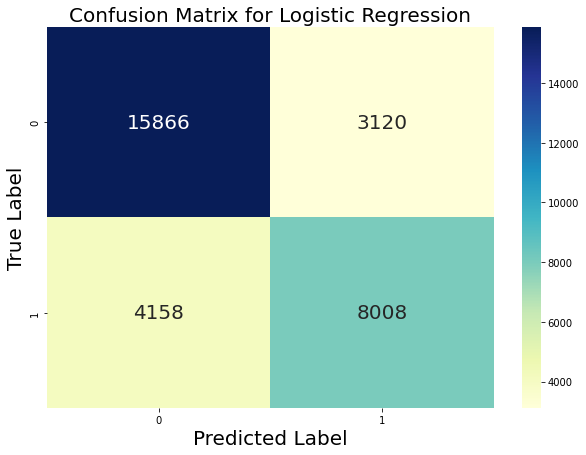

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 7.479228496551514 seconds --- time for LogisticRegression
Accuracy    = 0.7663713405238829
Precison    = 0.719626168224299
Recall      = 0.6582278481012658
f1 score    = 0.6875590280758993
[[0.35003877 0.64996123]
 [0.41479011 0.58520989]
 [0.80711976 0.19288024]
 ...
 [0.10337135 0.89662865]
 [0.14844928 0.85155072]
 [0.72347021 0.27652979]]
Roc Auc Score of LogisticRegression =  0.848390526523614

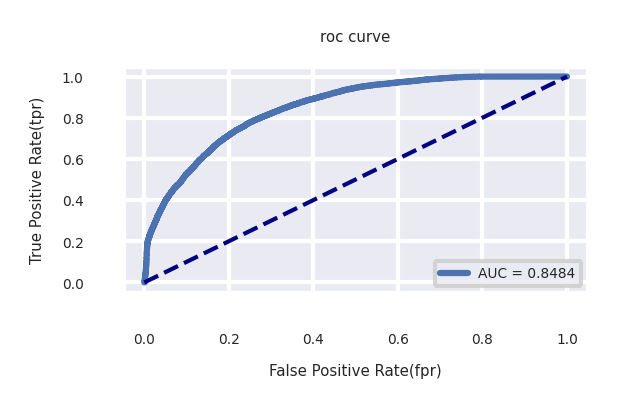

LogisticRegression(C=0.03, solver='liblinear')

In [ ]:
## Logistic Regression(With FS)
M.LogisticRegression()

In [ ]:
## Support Vector Machine
M.SupportVectorMachine()

Confusion Matrix:
 [[18984     2]
 [    0 12166]]


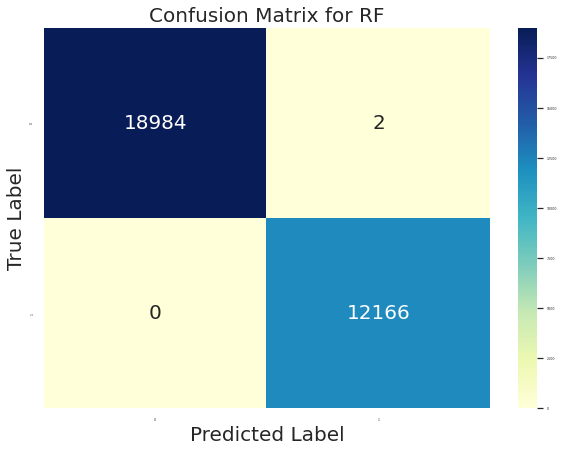

Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18984
           1       1.00      1.00      1.00     12168

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
--- 42.41839337348938 seconds ---
Accuracy    = 0.9999357986646122
Precison    = 0.9998356344510191
Recall      = 1.0
f1 score    = 0.999917810470946
[[0.02741688 0.97258312]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]]
Roc Auc Score of RF =  1.0


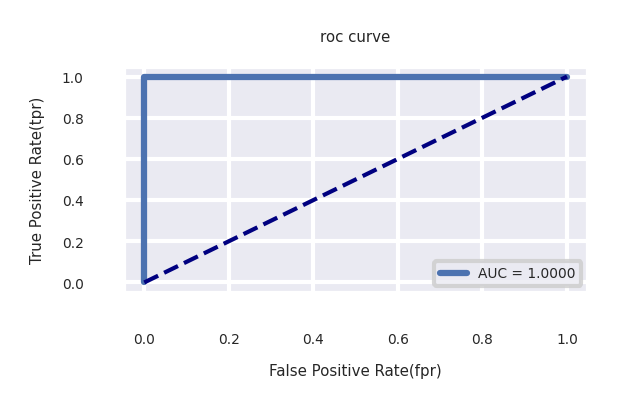

RandomForestClassifier(min_samples_split=10, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=1)

In [ ]:
# Random forest
M.RandomForest()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Confusion Matrix:
 [[18588   398]
 [  155 12011]]


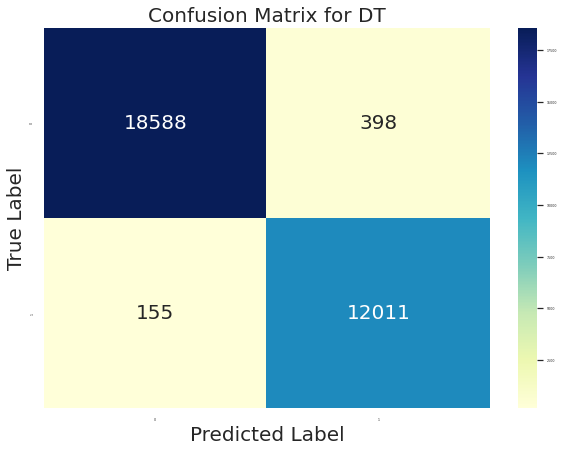

criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 201.2021222114563 seconds ---
Accuracy    = 0.98224833076528
Precison    = 0.9679265049560802
Recall      = 0.9872595758671708
f1 score    = 0.977497456765005
[[0.02162838 0.97837162]
 [0.02162838 0.97837162]
 [1.         0.        ]
 ...
 [0.02162838 0.97837162]
 [0.02162838 0.97837162]
 [1.         0.        ]]
Roc Auc Score of DT =  0.9926740905275054


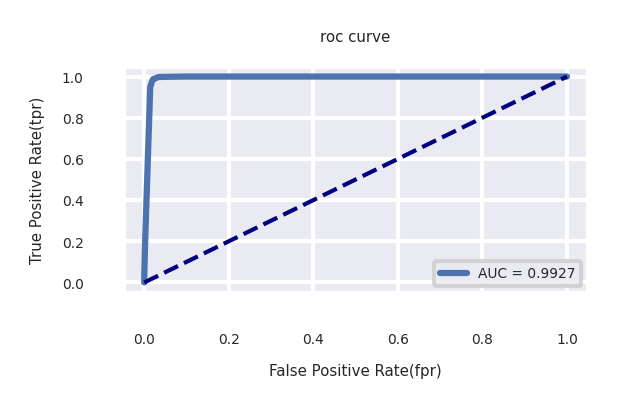

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=11)

In [ ]:
# Decision tree
M.DecisionTree()

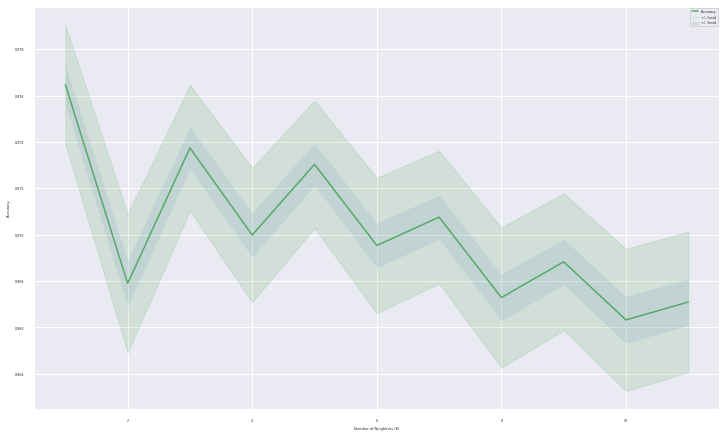

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Confusion Matrix:
 [[18737   249]
 [  265 11901]]


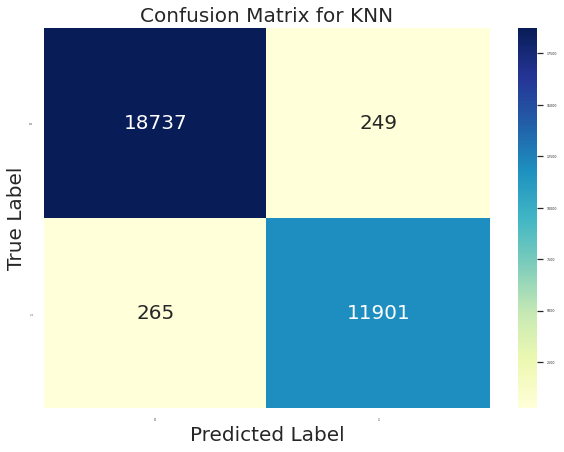

Accuracy of KNN model 98.0% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19002
           1       0.98      0.98      0.98     12150

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 1713.5883696079254 seconds ---
Accuracy    = 0.9670968156137648
Precison    = 0.9615543955588698
Recall      = 0.953887884267631
f1 score    = 0.9577057974004539
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Roc Auc Score of KNN =  0.9945981399135755


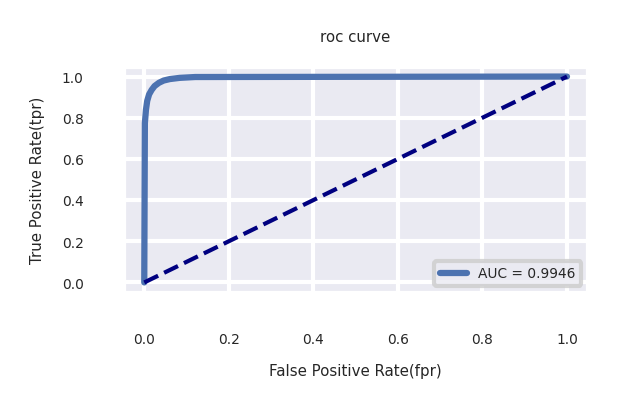

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# KNearestNeighbour
M.KNearetsNeighbor()